<a href="https://colab.research.google.com/github/dheekshadevaraj/Healthcare-Data-Analytics/blob/main/Healthcare_Data_Analytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
file="https://raw.githubusercontent.com/swapnilsaurav/projects/refs/heads/main/healthcare_patient_data.csv"
# Load Dataset
df = pd.read_csv(file)


In [3]:
# Step 1: Drop duplicate records
df = df.drop_duplicates()


In [4]:
# Step 2: Normalize Gender values
df["Gender"] = df["Gender"].str.strip().str.upper().replace({
    "MALE": "M", "FEMALE": "F", "UNKNOWN": np.nan, "-": np.nan
})
df["Gender"] = df["Gender"].fillna("Other")

In [5]:
# Step 3: Fix Age values
df["Age"] = pd.to_numeric(df["Age"], errors='coerce')
df["Age"] = df["Age"].apply(lambda x: x if 0 < x < 120 else np.nan)
df["Age"] = df["Age"].fillna(df["Age"].median())

In [6]:
# Step 4: Fix VisitDate
df["VisitDate"] = pd.to_datetime(df["VisitDate"], errors='coerce')

In [7]:
# Step 5: Clean Blood Pressure
# Convert string like '120/80' to systolic and diastolic
bp_split = df["BloodPressure"].str.extract(r'(?P<Systolic>\d{2,3})/(?P<Diastolic>\d{2,3})')
df["Systolic"] = pd.to_numeric(bp_split["Systolic"], errors='coerce')
df["Diastolic"] = pd.to_numeric(bp_split["Diastolic"], errors='coerce')
df["Systolic"] = df["Systolic"].clip(90, 200)
df["Diastolic"] = df["Diastolic"].clip(60, 120)

In [8]:
# Step 6: Normalize Diagnoses
df["Diagnosis"] = df["Diagnosis"].str.strip().str.title()
df["Diagnosis"] = df["Diagnosis"].replace({"N/A": np.nan, "-": np.nan})
df["Diagnosis"] = df["Diagnosis"].fillna("Not Specified")


In [9]:
# Step 7: Clean Notes
df["Notes"] = df["Notes"].replace(["", "-", "N/A", "unknown"], np.nan)
df["Notes"] = df["Notes"].fillna("No additional notes.")


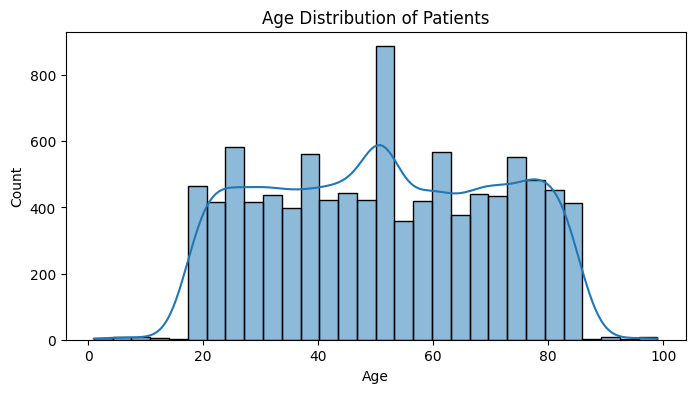

In [10]:
# Step 8: Visualizations

# Age Distribution
plt.figure(figsize=(8, 4))
sns.histplot(df["Age"], bins=30, kde=True)
plt.title("Age Distribution of Patients")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()


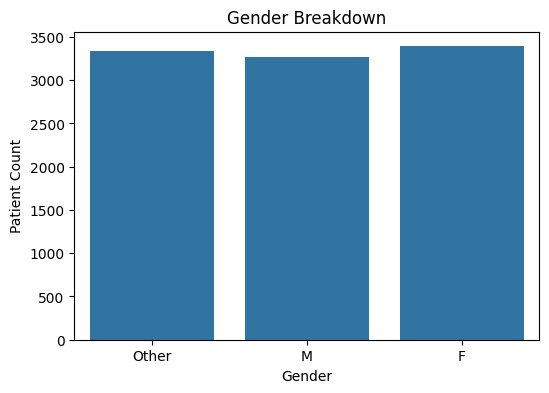

In [11]:
# Gender Distribution
plt.figure(figsize=(6, 4))
sns.countplot(x="Gender", data=df)
plt.title("Gender Breakdown")
plt.xlabel("Gender")
plt.ylabel("Patient Count")
plt.show()


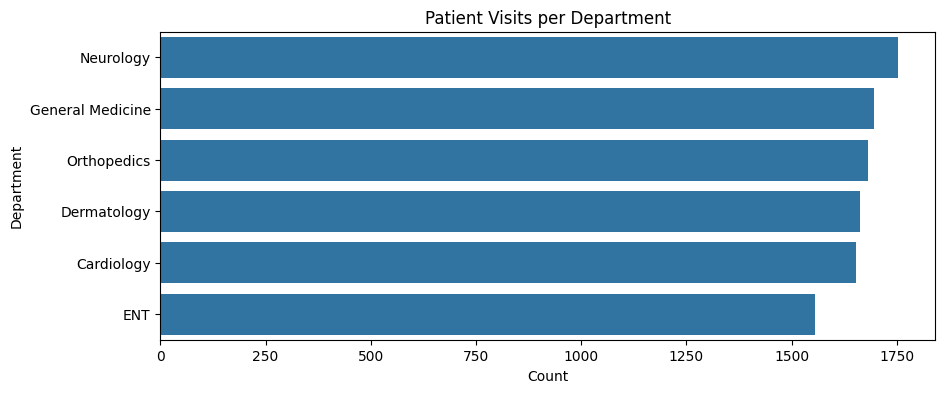

In [12]:
# Department Count
plt.figure(figsize=(10, 4))
sns.countplot(y="Department", data=df, order=df["Department"].value_counts().index)
plt.title("Patient Visits per Department")
plt.xlabel("Count")
plt.ylabel("Department")
plt.show()


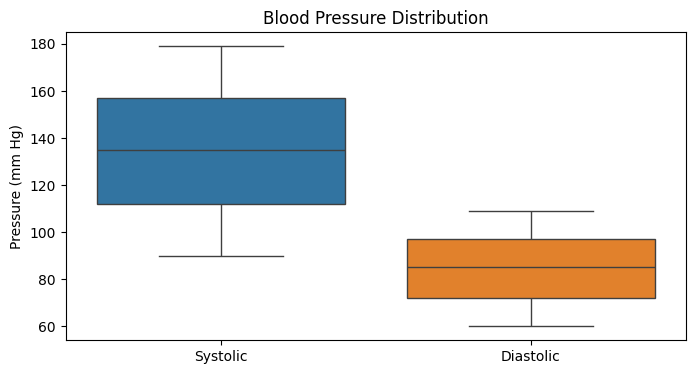

In [13]:
# Blood Pressure - Boxplots
plt.figure(figsize=(8, 4))
sns.boxplot(data=df[["Systolic", "Diastolic"]])
plt.title("Blood Pressure Distribution")
plt.ylabel("Pressure (mm Hg)")
plt.show()


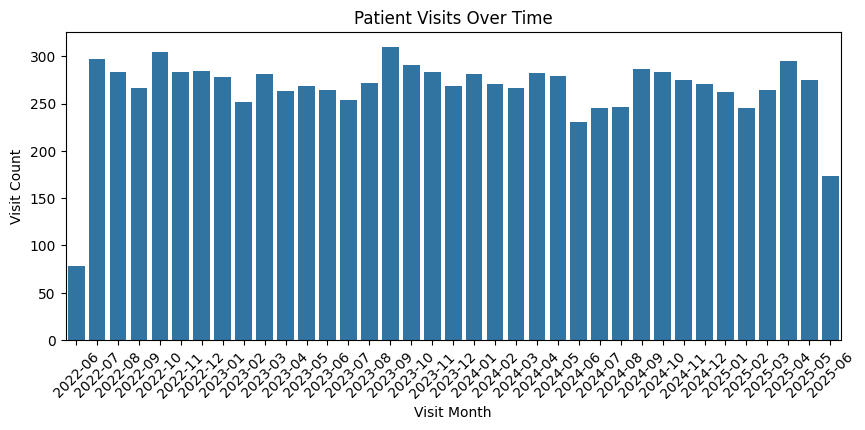

In [14]:
# Visit Trend Over Time
plt.figure(figsize=(10, 4))
df["VisitMonth"] = df["VisitDate"].dt.to_period("M")
sns.countplot(x="VisitMonth", data=df.sort_values("VisitMonth"))
plt.xticks(rotation=45)
plt.title("Patient Visits Over Time")
plt.xlabel("Visit Month")
plt.ylabel("Visit Count")
plt.show()